## Motivation

Please read this section and post your replies to Questions 4-5-6-7)
Below is a dataset for daily vaccination numbers per country.  Please implement a small program that reads the input file and produces the desired outputs for below questions, optimized for speed of operation. (Preferred language is Python or C#) 

Please paste the link to the code implementation tasks as answer shared using pastebin, github, bitbucket, coderpad.io, dotnetfiddle, jsfiddle, or any other public web-site.

Dataset link : http://pi.works/country_vaccinations_dataset


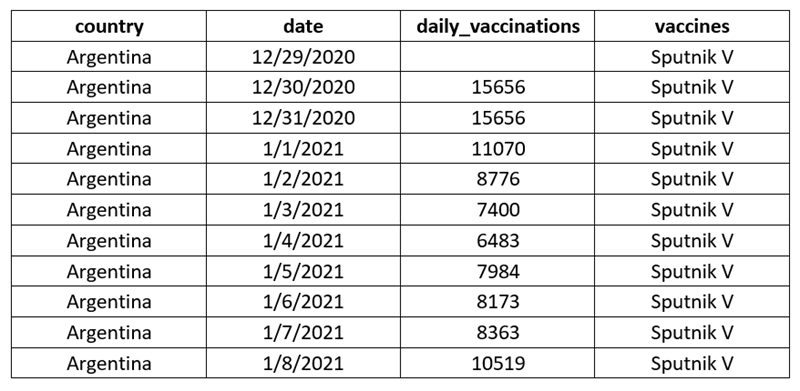

### 1). Library Import Operations

In [1]:
import pandas as pd
import numpy as np

### 2). Library Settings

In [2]:
# I close the warnings because I don't want to see them.
import warnings
warnings.simplefilter(action='ignore')

# The number to be displayed after the comma is set as 2 digits.
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# The library setting is made in order to see all rows and columns in the printouts.
pd.set_option('display.max_columns', None); 
pd.set_option('display.max_rows', None);

### 3). Reading the Data

In [3]:
url = "http://pi.works/country_vaccinations_dataset"
df = pd.read_csv(url)
df_copy = df.copy()
df.head()

,country,date,daily_vaccinations,vaccines
0,Argentina,12/29/2020,nan,Sputnik V
1,Argentina,12/30/2020,15656.00,Sputnik V
2,Argentina,12/31/2020,15656.00,Sputnik V
3,Argentina,1/1/2021,11070.00,Sputnik V
4,Argentina,1/2/2021,8776.00,Sputnik V


### 4). Discovery Data Analysis

In [4]:
# structural information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             1502 non-null   object 
 1   date                1502 non-null   object 
 2   daily_vaccinations  1442 non-null   float64
 3   vaccines            1502 non-null   object 
dtypes: float64(1), object(3)
memory usage: 47.1+ KB


In [5]:
# data types in the data set
df.dtypes

country                object
date                   object
daily_vaccinations    float64
vaccines               object
dtype: object

In [6]:
# size information in the data set
df.shape

(1502, 4)

In [7]:
# what are the missing data in the data set?
df.isnull().sum()

country                0
date                   0
daily_vaccinations    60
vaccines               0
dtype: int64

In [8]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
daily_vaccinations,1442.00,43349.59,116536.66,1.00,1659.75,5567.00,27979.75,1126251.00


### 5). Data PreProcessing

In [9]:
# type converting of 'date'
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.dtypes

country                       object
date                  datetime64[ns]
daily_vaccinations           float64
vaccines                      object
dtype: object

In [11]:
result_min = df.groupby('country').agg({'daily_vaccinations': ['min']}) 
result_min

,daily_vaccinations
,min
country,
Argentina,6483.00
Austria,3368.00
Bahrain,943.00
Belgium,1.00
Brazil,112.00
Bulgaria,472.00
Canada,866.00
Chile,51.00


#### Question 4: 
Code Implementation Task: Implement code to fill the missing data (impute) in daily_vaccinations column per country with the minimum daily vaccination number of relevant countries.  
Note: If a country does not have any valid vaccination number yet, fill it with “0” (zero). 
Please  provide the link to your code as answer to this question.

In [12]:
df['filled_daily_vaccinations'] = df.groupby('country')['daily_vaccinations'].transform(
    lambda grp: grp.fillna(np.min(grp)))
df

,country,date,daily_vaccinations,vaccines,filled_daily_vaccinations
0,Argentina,2020-12-29,nan,Sputnik V,6483.00
1,Argentina,2020-12-30,15656.00,Sputnik V,15656.00
2,Argentina,2020-12-31,15656.00,Sputnik V,15656.00
3,Argentina,2021-01-01,11070.00,Sputnik V,11070.00
4,Argentina,2021-01-02,8776.00,Sputnik V,8776.00
5,Argentina,2021-01-03,7400.00,Sputnik V,7400.00
6,Argentina,2021-01-04,6483.00,Sputnik V,6483.00
7,Argentina,2021-01-05,7984.00,Sputnik V,7984.00
8,Argentina,2021-01-06,8173.00,Sputnik V,8173.00
9,Argentina,2021-01-07,8363.00,Sputnik V,8363.00


In [13]:
# If there is a missing data in the filled_daily_vaccinations column, it means that the country does not have any valid vaccination number yet for the corresponding row. 
# I'll fill it with 0.
df.isnull().sum()

country                       0
date                          0
daily_vaccinations           60
vaccines                      0
filled_daily_vaccinations     1
dtype: int64

In [14]:
# I'll check the recording with a NaN value.
df[df.filled_daily_vaccinations.isnull()]

,country,date,daily_vaccinations,vaccines,filled_daily_vaccinations
750,Kuwait,2020-12-28,nan,Pfizer/BioNTech,nan


In [15]:
# I'll fill it with 0.
df['filled_daily_vaccinations'] = df['filled_daily_vaccinations'].replace(np.nan, 0)

In [16]:
# I'll check it again.
df.isnull().sum()

country                       0
date                          0
daily_vaccinations           60
vaccines                      0
filled_daily_vaccinations     0
dtype: int64

In [17]:
# I'll check the Kuwait data.
df[df['country'] == 'Kuwait']

,country,date,daily_vaccinations,vaccines,filled_daily_vaccinations
750,Kuwait,2020-12-28,nan,Pfizer/BioNTech,0.00


#### Question 5: 
Code Implementation Task: Implement code to list the top-3 countries with highest median daily vaccination numbers by considering missing values imputed version of dataset.
Please  provide the link to your code as answer to this question.

In [18]:
df_sorted_median = pd.DataFrame(df.groupby(by='country')['filled_daily_vaccinations'].median().sort_values(ascending=False)).iloc[:3]
df_sorted_median

,filled_daily_vaccinations
country,
United States,378253.00
China,276786.00
India,173922.00


#### Question 6:
What is the number of total vaccinations done on 1/6/2021 (MM/DD/YYYY) by considering missing values imputed version of dataset? Please  just provide the number as answer.

In [19]:
df_sum = pd.DataFrame(df.groupby('date')['filled_daily_vaccinations'].sum()).reset_index()
df_filtered = df_sum[df_sum['date'] == "2021-01-06"]
df_filtered

,date,filled_daily_vaccinations
24,2021-01-06,1485255.00
